<a href="https://colab.research.google.com/github/4graf/Data_Processing/blob/main/Preprocessing%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Преодобработка естественного текста

Подключение необходимых библиотек:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

! pip install pymorphy2
import pymorphy2

! pip install pymystem3
from pymystem3 import Mystem

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




Устанавливаем tqdm для pandas, чтобы видеть панель прогресса



In [ ]:
tqdm.pandas(desc='Progress')

> Чтение негативных и позитивных сообщений RuTweetCorp:

In [ ]:
! head -5 /content/negative.csv

"408906762813579264";"1386325944";"dugarchikbellko";"на работе был полный пиддес :| и так каждое закрытие месяца, я же свихнусь так D:";"-1";"0";"0";"0";"8064";"111";"94";"2"
"408906818262687744";"1386325957";"nugemycejela";"Коллеги сидят рубятся в Urban terror, а я из-за долбанной винды не могу :(";"-1";"0";"0";"0";"26";"42";"39";"0"
"408906858515398656";"1386325966";"4post21";"@elina_4post как говорят обещаного три года ждут...((";"-1";"0";"0";"0";"718";"49";"249";"0"
"408906914437685248";"1386325980";"Poliwake";"Желаю хорошего полёта и удачной посадки,я буду очень сильно скучать( http://t.co/jCLNzVNv3S";"-1";"0";"0";"0";"10628";"207";"200";"0"
"408906914723295232";"1386325980";"capyvixowe";"Обновил за каким-то лешим surf, теперь не работает простоплеер :(";"-1";"0";"0";"0";"35";"17";"34";"0"


In [ ]:
labels = ['id', 'tdate', 'tname', 'ttext', 'ttype', 'trep', 'trtv', 'tfav', 
          'tstcount', 'tfol', 'tfrien', 'listcount']

neg_df = pd.read_csv('negative.csv', sep=';', names=labels)
display(neg_df.head())

pos_df = pd.read_csv('positive.csv', sep=';', names=labels)
pos_df.head()

,id,tdate,tname,ttext,ttype,trep,trtv,tfav,tstcount,tfol,tfrien,listcount
0,408906762813579264,1386325944,dugarchikbellko,на работе был полный пиддес :| и так каждое за...,-1,0,0,0,8064,111,94,2
1,408906818262687744,1386325957,nugemycejela,"Коллеги сидят рубятся в Urban terror, а я из-з...",-1,0,0,0,26,42,39,0
2,408906858515398656,1386325966,4post21,@elina_4post как говорят обещаного три года жд...,-1,0,0,0,718,49,249,0
3,408906914437685248,1386325980,Poliwake,"Желаю хорошего полёта и удачной посадки,я буду...",-1,0,0,0,10628,207,200,0
4,408906914723295232,1386325980,capyvixowe,"Обновил за каким-то лешим surf, теперь не рабо...",-1,0,0,0,35,17,34,0


,id,tdate,tname,ttext,ttype,trep,trtv,tfav,tstcount,tfol,tfrien,listcount
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1


> Среднее количество ретвитов у негативных и позитивных сообщений: 

In [ ]:
mean_trtv = {'negative': neg_df['trtv'].mean(),
             'positive': pos_df['trtv'].mean()}
mean_trtv

{'negative': 2.0420199601511753, 'positive': 4.166494069323216}

> Расчёт статистики сообщений на каждого пользователя:

In [ ]:
neg_mg_count_from_person = neg_df.groupby(['tname'])['id'].count()
pos_mg_count_from_person = pos_df.groupby(['tname'])['id'].count()
# all_mg_count_from_person = pd.merge(neg_mg_count_from_person, pos_mg_count_from_person, 
                                    # how='outer', on='tname').sum(1)
all_mg_count_from_person = neg_mg_count_from_person.add(pos_mg_count_from_person,
                                                        fill_value=0)

display(all_mg_count_from_person.describe())
print('\nThe person who typed the maximum number of messages:', 
      all_mg_count_from_person.idxmax())

count    139658.000000
mean          1.624211
std           1.667628
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          67.000000
Name: id, dtype: float64


The person who typed the maximum number of messages: MsWildFan




>Функции для очистки текста и токенизации на предложения и слова. Для фильтрации стоп слов используется библиотека nltk и добавляются отсутствующие в nltk и специфические для данной задачи слова. [*Общий список стоп слов русского языка*](https://snipp.ru/seo/stop-ru-words)



In [ ]:
def clean_text(text):
    pattern_replacements = [
        (r'http\S+|https\S+|www\S+', 'URL'),
        (r'[^\w?!.,_ -]', ' '),
        (r' {2,}', ' '),
        (r'^ ', '')
    ]
    text = text.lower()
    for old, new in pattern_replacements:
        text = re.sub(old, new, text)
    return text

def filter_stopwords(words):
    stopwords = nltk.corpus.stopwords.words('russian')
    added_stopwords = ['какой-то', 'какая-то', 'какие-то', 'кто-то', 'что-то',
                       'это', 'всё', 'весь', 'просто', 'ещё', 
                       'url', 'rt', 'd']
    stopwords.extend(added_stopwords)
    return [word for word in words if word not in stopwords]

def tokenize_sentence(text):
    ending_symbols = r'.!?'
    abbreviations = r'т.п.|т.д.|т.е.|г.|гг.|пр.|др.|ч.|мин.|с.|обл.|стр.' 
    pattern = re.compile(fr'''\s?
                        ((?:\b(?:{abbreviations})\W|[^{ending_symbols}])+
                        (?:[{ending_symbols}]+|.$))''', re.X)
    return pattern.findall(text)

def tokenize_word(text):
    # pattern = re.compile(r'[^\W_]+')
    dash_words = r'\w+-то|\w+-либо|из-за'
    pattern = re.compile(fr'{dash_words}|\w+')
    return pattern.findall(text)

# nltk.corpus.stopwords.words('russian')

> Токенизация сообщений негативного и положительного корпусов с помощью регулярных выражений

In [ ]:
neg_tokens_re = neg_df.loc[:, ['id', 'ttext']]
neg_tokens_re['cleaned_text'] = neg_tokens_re.ttext.apply(clean_text)
neg_tokens_re['sentences'] = neg_tokens_re.cleaned_text.apply(tokenize_sentence)
neg_tokens_re['words'] = neg_tokens_re.cleaned_text.apply(tokenize_word)
neg_tokens_re['count_sentences'] = neg_tokens_re.sentences.apply(len)
neg_tokens_re['count_words'] = neg_tokens_re.words.apply(len)

pos_tokens_re = pos_df.loc[:, ['id', 'ttext']]
pos_tokens_re['cleaned_text'] = pos_tokens_re.ttext.apply(clean_text)
pos_tokens_re['sentences'] = pos_tokens_re.cleaned_text.apply(tokenize_sentence)
pos_tokens_re['words'] = pos_tokens_re.cleaned_text.apply(tokenize_word)
pos_tokens_re['count_sentences'] = pos_tokens_re.sentences.apply(len)
pos_tokens_re['count_words'] = pos_tokens_re.words.apply(len)

In [ ]:
display(neg_tokens_re.head())
neg_tokens_re.describe()

,id,ttext,cleaned_text,sentences,words,count_sentences,count_words
0,408906762813579264,на работе был полный пиддес :| и так каждое за...,на работе был полный пиддес и так каждое закры...,[на работе был полный пиддес и так каждое закр...,"[на, работе, был, полный, пиддес, и, так, кажд...",1,15
1,408906818262687744,"Коллеги сидят рубятся в Urban terror, а я из-з...","коллеги сидят рубятся в urban terror, а я из-з...","[коллеги сидят рубятся в urban terror, а я из-...","[коллеги, сидят, рубятся, в, urban, terror, а,...",1,13
2,408906858515398656,@elina_4post как говорят обещаного три года жд...,elina_4post как говорят обещаного три года жду...,[elina_4post как говорят обещаного три года жд...,"[elina_4post, как, говорят, обещаного, три, го...",1,7
3,408906914437685248,"Желаю хорошего полёта и удачной посадки,я буду...","желаю хорошего полёта и удачной посадки,я буду...","[желаю хорошего полёта и удачной посадки,я буд...","[желаю, хорошего, полёта, и, удачной, посадки,...",1,12
4,408906914723295232,"Обновил за каким-то лешим surf, теперь не рабо...","обновил за каким-то лешим surf, теперь не рабо...","[обновил за каким-то лешим surf, теперь не раб...","[обновил, за, каким-то, лешим, surf, теперь, н...",1,9


,id,count_sentences,count_words
count,1.119230e+05,111923.000000,111923.000000
mean,4.164563e+17,1.605425,11.967040
std,4.620206e+15,0.896469,5.064364
min,4.089068e+17,1.000000,1.000000
25%,4.125892e+17,1.000000,8.000000
50%,4.158227e+17,1.000000,11.000000
75%,4.200829e+17,2.000000,15.000000
max,4.251386e+17,17.000000,38.000000


In [ ]:
display(pos_tokens_re.head())
pos_tokens_re.describe()

,id,ttext,cleaned_text,sentences,words,count_sentences,count_words
0,408906692374446080,"@first_timee хоть я и школота, но поверь, у на...","first_timee хоть я и школота, но поверь, у нас...","[first_timee хоть я и школота, но поверь, у на...","[first_timee, хоть, я, и, школота, но, поверь,...",1,17
1,408906692693221377,"Да, все-таки он немного похож на него. Но мой ...","да, все-таки он немного похож на него. но мой ...","[да, все-таки он немного похож на него., но мо...","[да, все, таки, он, немного, похож, на, него, ...",2,15
2,408906695083954177,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,rt katiacheh ну ты идиотка я испугалась за теб...,[rt katiacheh ну ты идиотка я испугалась за те...,"[rt, katiacheh, ну, ты, идиотка, я, испугалась...",1,9
3,408906695356973056,"RT @digger2912: ""Кто то в углу сидит и погибае...",rt digger2912 кто то в углу сидит и погибает о...,[rt digger2912 кто то в углу сидит и погибает ...,"[rt, digger2912, кто, то, в, углу, сидит, и, п...",1,26
4,408906761416867842,@irina_dyshkant Вот что значит страшилка :D\nН...,irina_dyshkant вот что значит страшилка d но б...,[irina_dyshkant вот что значит страшилка d но ...,"[irina_dyshkant, вот, что, значит, страшилка, ...",1,20


,id,count_sentences,count_words
count,1.149110e+05,114911.000000,114911.000000
mean,4.101934e+17,1.626702,12.651400
std,6.789925e+14,0.900840,4.818056
min,4.089067e+17,1.000000,1.000000
25%,4.096183e+17,1.000000,9.000000
50%,4.101237e+17,1.000000,12.000000
75%,4.108024e+17,2.000000,16.000000
max,4.113689e+17,29.000000,42.000000


In [ ]:
neg_tokens_re['sentences'][11]

['блин начали сниться сны не когда почти не снились !',
 'а теперь можно сказать каждый день такое !',
 'мне это не нравиться ']

> Токенизация сообщений негативного и положительного корпусов с помощью библиотеки nltk

In [ ]:
neg_tokens_nltk = neg_df.loc[:,['id', 'ttext']]
neg_tokens_nltk['cleaned_text'] = neg_tokens_nltk.ttext.apply(clean_text)
neg_tokens_nltk['sentences'] = neg_tokens_nltk.cleaned_text.apply(nltk.sent_tokenize, language='russian')
neg_tokens_nltk['words'] = neg_tokens_nltk.cleaned_text.apply(nltk.word_tokenize, language='russian')
neg_tokens_nltk['count_sentences'] = neg_tokens_nltk.sentences.apply(len)
neg_tokens_nltk['count_words'] = neg_tokens_nltk.words.apply(len)

pos_tokens_nltk = pos_df.loc[:,['id', 'ttext']]
pos_tokens_nltk['cleaned_text'] = pos_tokens_nltk.ttext.apply(clean_text)
pos_tokens_nltk['sentences'] = pos_tokens_nltk.cleaned_text.apply(nltk.sent_tokenize, language='russian')
pos_tokens_nltk['words'] = pos_tokens_nltk.cleaned_text.apply(nltk.word_tokenize, language='russian')
pos_tokens_nltk['count_sentences'] = pos_tokens_nltk.sentences.apply(len)
pos_tokens_nltk['count_words'] = pos_tokens_nltk.words.apply(len)

In [ ]:
neg_tokens_nltk.head()

,id,ttext,cleaned_text,sentences,words,count_sentences,count_words
0,408906762813579264,на работе был полный пиддес :| и так каждое за...,на работе был полный пиддес и так каждое закры...,[на работе был полный пиддес и так каждое закр...,"[на, работе, был, полный, пиддес, и, так, кажд...",1,16
1,408906818262687744,"Коллеги сидят рубятся в Urban terror, а я из-з...","коллеги сидят рубятся в urban terror, а я из-з...","[коллеги сидят рубятся в urban terror, а я из-...","[коллеги, сидят, рубятся, в, urban, terror, ,,...",1,14
2,408906858515398656,@elina_4post как говорят обещаного три года жд...,elina_4post как говорят обещаного три года жду...,[elina_4post как говорят обещаного три года жд...,"[elina_4post, как, говорят, обещаного, три, го...",1,8
3,408906914437685248,"Желаю хорошего полёта и удачной посадки,я буду...","желаю хорошего полёта и удачной посадки,я буду...","[желаю хорошего полёта и удачной посадки,я буд...","[желаю, хорошего, полёта, и, удачной, посадки,...",1,13
4,408906914723295232,"Обновил за каким-то лешим surf, теперь не рабо...","обновил за каким-то лешим surf, теперь не рабо...","[обновил за каким-то лешим surf, теперь не раб...","[обновил, за, каким-то, лешим, surf, ,, теперь...",1,10


> Различие токенизаций с помощью регулярных выражений и с помощью nltk:

In [ ]:
print('Tokenize by regex:', neg_tokens_re['sentences'][11])
print('Tokenize by nltk:', neg_tokens_nltk['sentences'][11])

Tokenize by regex: ['блин начали сниться сны не когда почти не снились !', 'а теперь можно сказать каждый день такое !', 'мне это не нравиться ']
Tokenize by nltk: ['блин начали сниться сны не когда почти не снились !', 'а теперь можно сказать каждый день такое !', 'мне это не нравиться']


In [ ]:
print('Tokenize by regex:', neg_tokens_re['words'][11])
print('Tokenize by nltk:', neg_tokens_nltk['words'][11])

Tokenize by regex: ['блин', 'начали', 'сниться', 'сны', 'не', 'когда', 'почти', 'не', 'снились', 'а', 'теперь', 'можно', 'сказать', 'каждый', 'день', 'такое', 'мне', 'это', 'не', 'нравиться']
Tokenize by nltk: ['блин', 'начали', 'сниться', 'сны', 'не', 'когда', 'почти', 'не', 'снились', '!', 'а', 'теперь', 'можно', 'сказать', 'каждый', 'день', 'такое', '!', 'мне', 'это', 'не', 'нравиться']


> Библиотека nltk знаки пунктуации считает отдельными словами, поэтому удалим их вручную

In [ ]:
import string

neg_tokens_nltk['words'] = neg_tokens_nltk['words'].\
    apply(lambda words: [word for word in words if word not in string.punctuation])
neg_tokens_nltk['count_words'] = neg_tokens_nltk.words.apply(len)

pos_tokens_nltk['words'] = pos_tokens_nltk['words'].\
    apply(lambda words: [word for word in words if word not in string.punctuation])
pos_tokens_nltk['count_words'] = pos_tokens_nltk.words.apply(len)

In [ ]:
print('Tokenize by regex:', neg_tokens_re['words'][11])
print('Tokenize by nltk:', neg_tokens_nltk['words'][11])

Tokenize by regex: ['блин', 'начали', 'сниться', 'сны', 'не', 'когда', 'почти', 'не', 'снились', 'а', 'теперь', 'можно', 'сказать', 'каждый', 'день', 'такое', 'мне', 'это', 'не', 'нравиться']
Tokenize by nltk: ['блин', 'начали', 'сниться', 'сны', 'не', 'когда', 'почти', 'не', 'снились', 'а', 'теперь', 'можно', 'сказать', 'каждый', 'день', 'такое', 'мне', 'это', 'не', 'нравиться']


> Вычтем статистики обоих методов токенизации и посмотрим на отличия

In [ ]:
print('Negative:')
display(neg_tokens_re.describe()-neg_tokens_nltk.describe())

print('\nPositive:')
pos_tokens_re.describe()-pos_tokens_nltk.describe()

Negative:


,id,count_sentences,count_words
count,0.0,0.000000,0.000000
mean,0.0,0.209358,-0.107574
std,0.0,0.190850,-0.035854
min,0.0,0.000000,0.000000
25%,0.0,0.000000,0.000000
50%,0.0,0.000000,0.000000
75%,0.0,0.000000,0.000000
max,0.0,6.000000,1.000000



Positive:


,id,count_sentences,count_words
count,0.0,0.000000,0.000000
mean,0.0,0.167921,0.001366
std,0.0,0.158130,-0.001710
min,0.0,0.000000,0.000000
25%,0.0,0.000000,0.000000
50%,0.0,0.000000,0.000000
75%,0.0,0.000000,0.000000
max,0.0,20.000000,-2.000000


> После сравнения статистик нашлось сообщение, которое различается в 20 предложений, в зависимости от метода токенизации. Написанные регулярные выражения каждую, отдельно стоящую, точку выделяют в отдельное предложение

In [ ]:
index_max_sent = pos_tokens_re.count_sentences.idxmax()
display(pos_tokens_re.sentences.loc[index_max_sent])
pos_tokens_nltk.sentences.loc[index_max_sent]

['rt mhe626384315253 хочешь узнать мальчик ты или девочка?',
 'посмотри внизу .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 ' .',
 'да не зд ']

['rt mhe626384315253 хочешь узнать мальчик ты или девочка?',
 'посмотри внизу .',
 '. . . . . . . . . . . . . . . . . . . . . . . . . . да не зд']

> Приведение к нормальным формам слов с помощью pymorphy2 и удаление стоп слов:

In [ ]:
morph = pymorphy2.MorphAnalyzer()

neg_tokens_re['lemmas'] = neg_tokens_re.words.progress_apply(
    lambda words: filter_stopwords(
        [morph.parse(word)[0].normal_form for word in words]
        )
    )

pos_tokens_re['lemmas'] = pos_tokens_re.words.progress_apply(
    lambda words: filter_stopwords(
        [morph.parse(word)[0].normal_form for word in words]
        )
    )

Progress: 100%|██████████| 114911/114911 [06:22<00:00, 300.07it/s]


In [ ]:
neg_tokens_re[['words', 'lemmas']].head()

,words,lemmas
0,"[на, работе, был, полный, пиддес, и, так, кажд...","[работа, полный, пиддес, каждый, закрытие, мес..."
1,"[коллеги, сидят, рубятся, в, urban, terror, а,...","[коллега, сидеть, рубиться, urban, terror, из-..."
2,"[elina_4post, как, говорят, обещаного, три, го...","[elina_4post, говорить, обещаной, год, ждать]"
3,"[желаю, хорошего, полёта, и, удачной, посадки,...","[желать, хороший, полёт, удачный, посадка, оче..."
4,"[обновил, за, каким-то, лешим, surf, теперь, н...","[обновить, леший, surf, работать, простоплеер]"


In [ ]:
pos_tokens_re[['words', 'lemmas']].head()

,words,lemmas
0,"[first_timee, хоть, я, и, школота, но, поверь,...","[first_timee, школотый, поверь, самый, обществ..."
1,"[да, все, таки, он, немного, похож, на, него, ...","[таки, немного, похожий, мальчик, равно, хороший]"
2,"[rt, katiacheh, ну, ты, идиотка, я, испугалась...","[katiacheh, идиотка, испугаться]"
3,"[rt, digger2912, кто, то, в, углу, сидит, и, п...","[digger2912, угол, сидеть, погибать, голод, 2,..."
4,"[irina_dyshkant, вот, что, значит, страшилка, ...","[irina_dyshkant, значит, страшилка, блин, посм..."


> Приведение к нормальным формам слов с помощью pymystem3 и удаление стоп слов:

In [ ]:
m = Mystem()  

neg_tokens_nltk['lemmas'] = neg_tokens_nltk.words.progress_apply(
    lambda words: filter_stopwords(
        [m.lemmatize(word)[0] for word in words]
        )
    )

pos_tokens_nltk['lemmas'] = pos_tokens_nltk.words.progress_apply(
    lambda words: filter_stopwords(
        [m.lemmatize(word)[0] for word in words]
        )
    )

Progress: 100%|██████████| 114911/114911 [03:26<00:00, 555.58it/s]


In [ ]:
neg_tokens_nltk[['words', 'lemmas']].head()

,words,lemmas
0,"[на, работе, был, полный, пиддес, и, так, кажд...","[работа, полный, пиддес, каждый, закрытие, мес..."
1,"[коллеги, сидят, рубятся, в, urban, terror, а,...","[коллега, сидеть, рубиться, urban, terror, из-..."
2,"[elina_4post, как, говорят, обещаного, три, го...","[elina, говорить, обещаной, год, ждать, ...]"
3,"[желаю, хорошего, полёта, и, удачной, посадки,...","[желать, хороший, полет, удачный, посадка, оче..."
4,"[обновил, за, каким-то, лешим, surf, теперь, н...","[обновлять, леший, surf, работать, простоплеер]"


In [ ]:
pos_tokens_nltk[['words', 'lemmas']].head()

,words,lemmas
0,"[first_timee, хоть, я, и, школота, но, поверь,...","[first, школоть, поверять, самый, общество, пр..."
1,"[да, все-таки, он, немного, похож, на, него, н...","[все-таки, немного, похожий, мальчик, равно]"
2,"[rt, katiacheh, ну, ты, идиотка, я, испугалась...","[katiacheh, идиотка, испугаться]"
3,"[rt, digger2912, кто, то, в, углу, сидит, и, п...","[digger2912, угол, сидеть, погибать, голод, 2,..."
4,"[irina_dyshkant, вот, что, значит, страшилка, ...","[irina, значит, страшилка, блин, посмотреть, ч..."


> Нахождение самых популярных слов, количества их вхождений и частоты с помощью nltk

In [ ]:
# all = []
# [all.extend(row) for row in neg_tokens_re['lemmas'].to_list()]
all_lemmas_neg = list(itertools.chain(*neg_tokens_re['lemmas'].to_list()))
freq_dist_neg = nltk.FreqDist(all_lemmas_neg)
top_lemmas_neg = freq_dist_neg.most_common()
[(*lemma, freq_dist_neg.freq(lemma[0])) for lemma in top_lemmas_neg[:10]]

[('хотеть', 8113, 0.010608709524301438),
 ('мочь', 5468, 0.007150058385169513),
 ('день', 5261, 0.006879381339498319),
 ('сегодня', 4369, 0.005712985567813753),
 ('очень', 4049, 0.005294547622814806),
 ('год', 3712, 0.004853880161987789),
 ('знать', 3384, 0.004424981268363868),
 ('блин', 3279, 0.004287681317661089),
 ('завтра', 3254, 0.004254990853208046),
 ('человек', 3080, 0.004027465220614868)]

In [ ]:
all_lemmas_pos = list(itertools.chain(*pos_tokens_re['lemmas'].to_list()))
freq_dist_pos = nltk.FreqDist(all_lemmas_pos)
top_lemmas_pos = freq_dist_pos.most_common()
[(*lemma, freq_dist_pos.freq(lemma[0])) for lemma in top_lemmas_pos[:10]]

[('день', 5924, 0.006933877680966717),
 ('сегодня', 4537, 0.005310432653366981),
 ('хороший', 4440, 0.005196896843938592),
 ('хотеть', 3713, 0.004345963509356755),
 ('мочь', 3706, 0.004337770203521717),
 ('спасибо', 3676, 0.004302656035657267),
 ('очень', 3610, 0.004225404866355477),
 ('знать', 3587, 0.004198484004326065),
 ('любить', 3374, 0.003949173412488471),
 ('3', 3282, 0.0038414899643708245)]

> Построение графиков количества вхождения наиболее популярных слов с ограничением более 1000 вхождений 

<BarContainer object of 75 artists>

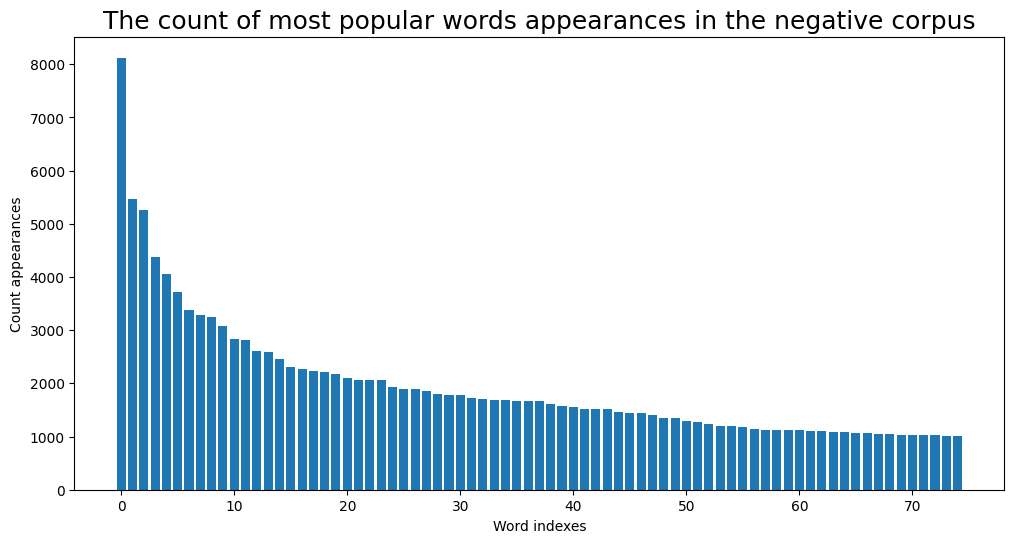

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.title('The count of most popular words appearances in the negative corpus',
          fontsize=18)
plt.xlabel('Word indexes')
plt.ylabel('Count appearances')

choosed_lemmas_neg = list(itertools.takewhile(lambda x: x[1] > 1000, top_lemmas_neg))
# plt.bar(*zip(*list(choosed_lemmas_neg)))
plt.bar(list(range(len(choosed_lemmas_neg))), [count[1] for count in choosed_lemmas_neg])

<BarContainer object of 74 artists>

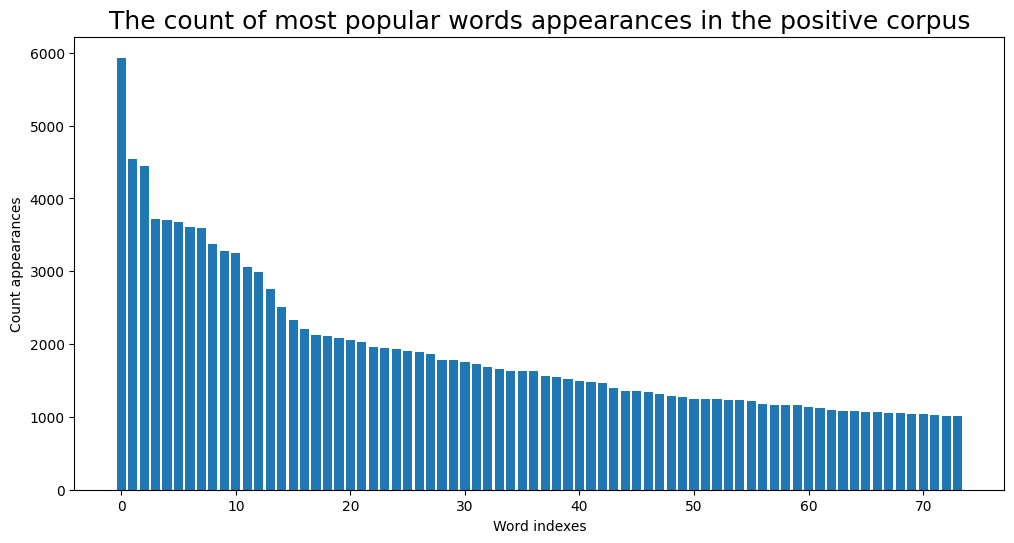

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.title('The count of most popular words appearances in the positive corpus',
          fontsize=18)
plt.xlabel('Word indexes')
plt.ylabel('Count appearances')

choosed_lemmas_pos = list(itertools.takewhile(lambda x: x[1] > 1000, top_lemmas_pos))
plt.bar(list(range(len(choosed_lemmas_pos))), [count[1] for count in choosed_lemmas_pos])

> Сравнение количества вхождений 10 самых популярных слов из одного корпуса с другим 

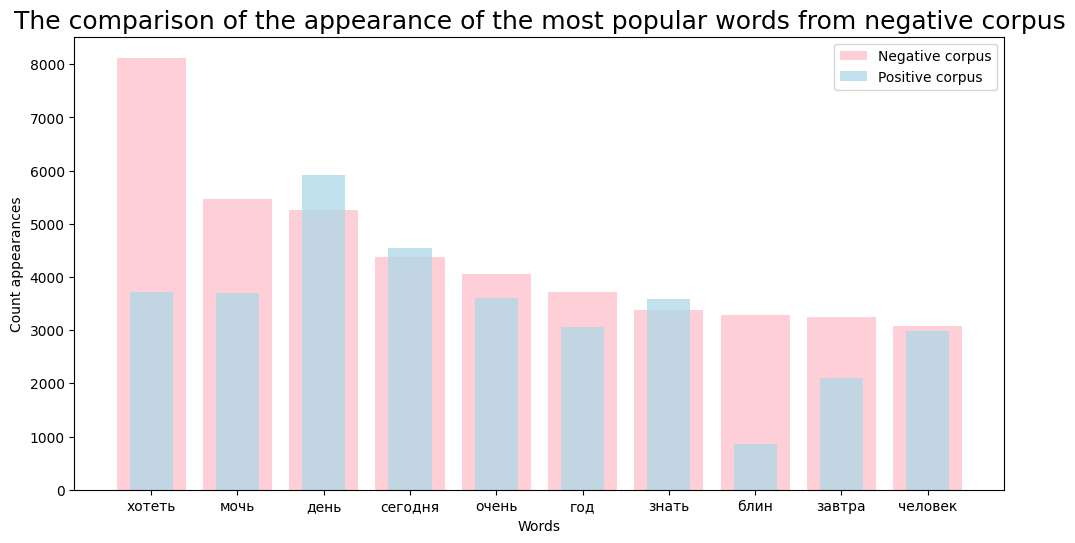

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.title('The comparison of the appearance of the most popular words from negative corpus',
          fontsize=18)
plt.xlabel('Words')
plt.ylabel('Count appearances')

x, y1 = zip(*list(choosed_lemmas_neg[:10]))
y2 = [freq_dist_pos.get(lemma) for lemma in x]

plt.bar(x, y1, color = 'pink', alpha=0.75, label='Negative corpus')
plt.bar(x, y2, color = 'lightblue', alpha=0.75, width = 0.5, label='Positive corpus')

plt.legend()

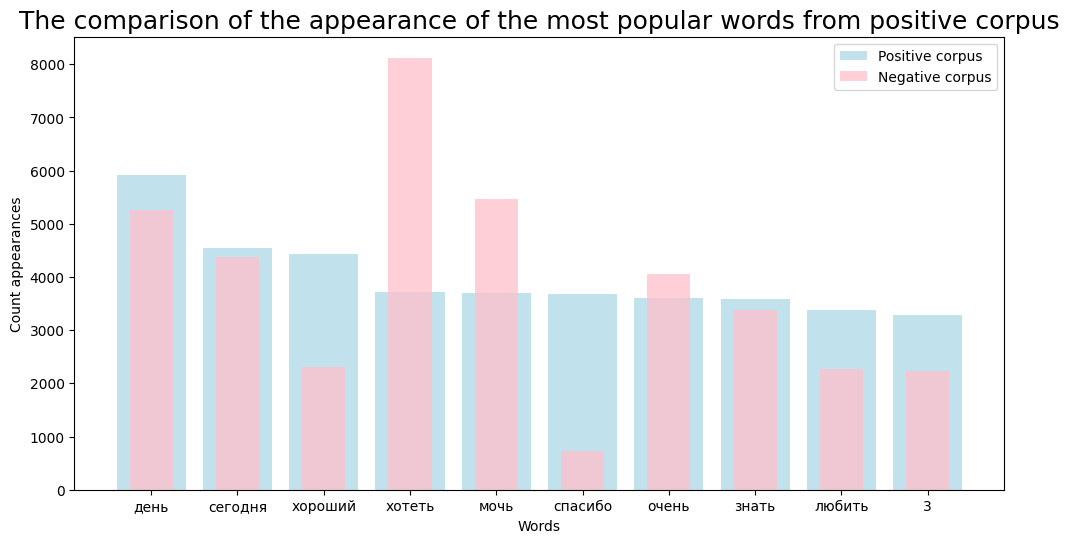

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.title('The comparison of the appearance of the most popular words from positive corpus',
          fontsize=18)
plt.xlabel('Words')
plt.ylabel('Count appearances')

x, y1 = zip(*list(choosed_lemmas_pos[:10]))
y2 = [freq_dist_neg.get(lemma) for lemma in x]

plt.bar(x, y1, color = 'lightblue', alpha=0.75, label='Positive corpus')
plt.bar(x, y2, color = 'pink', alpha=0.75, width = 0.5, label='Negative corpus')

plt.legend()